# Time Series Data

Today, we will explore some of the functionality that pandas offers for time series data.

Friendly Reminders:

* Project update, due tonight April 4 at 11:59 p.m.
* Homework #5 due April 11 at 11:59 p.m.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Date and Time Objects

Before we can discuss time series data, we need to discuss an important set of Python objects that we can use to represents dates and times. These scalar objects can be found in the **datetime** module, and include:

* date objects
* time objects
* datetime objects
* timedelta objects

In [2]:
import datetime as dt

In [3]:
# datetime.now
now = dt.datetime.now()
now

datetime.datetime(2019, 4, 22, 22, 55, 5, 82323)

In [4]:
# datetime attributes
print('Right now, it is %d:%d:%d.%d on %d/%d/%d' % (now.hour, now.minute, now.second, now.microsecond, now.month, now.day, now.year))


Right now, it is 22:55:5.82323 on 4/22/2019


In [5]:
# date and time objects
print('Date:', now.date())
print('Time:', now.time())

Date: 2019-04-22
Time: 22:55:05.082323


In [6]:
# Create datetime object
jan1 = dt.datetime(year=2019,day=1,month=1)
jan1

datetime.datetime(2019, 1, 1, 0, 0)

In [7]:
# Calculate difference between now and Jan. 1
td = now - jan1
td

datetime.timedelta(days=111, seconds=82505, microseconds=82323)

In [8]:
# timedelta attributes
print('The difference is %d days, %d seconds, and %d microseconds' % (td.days, td.seconds, td.microseconds))

The difference is 111 days, 82505 seconds, and 82323 microseconds


In [9]:
# Create timedelta object
td = dt.timedelta(days=1, hours=12)
td

datetime.timedelta(days=1, seconds=43200)

In [10]:
# Addition/subtraction with timedelta objects
now + 3 * td

datetime.datetime(2019, 4, 27, 10, 55, 5, 82323)

Dates and times are most often observed in data as text (strings), which is a format that does not support operations and comparisons. Therefore, we often need to convert one of the many date/time text formats into the appropriate datetime object.

There are two datetime module functions that help us to convert between datetime objects and strings:

* dt.datetime.strftime - Convert from datetime object to string (also available as .strftime method)
* dt.datetime.strptime - Convert from string to datetime object

In addition, there is the **parse** function in the dateutil.parser module, which is a more flexible function that can handle multiple datetime format types.

When converting between datetime objects and strings, there is a specific set of formatting specifiers for various formats, similar to our specifies for standard string formating (e.g., %d, %f, %s), shown in the table below.

In [11]:
pd.read_html('https://docs.python.org/3/library/datetime.html', match='Directive')[0].drop('Notes', axis=1)

,Directive,Meaning,Example
0,%a,Weekday as locale’s abbreviated name.,"Sun, Mon, …, Sat (en_US); So, Mo, …, Sa (de_DE)"
1,%A,Weekday as locale’s full name.,"Sunday, Monday, …, Saturday (en_US); Sonntag, ..."
2,%w,"Weekday as a decimal number, where 0 is Sunday...","0, 1, …, 6"
3,%d,Day of the month as a zero-padded decimal number.,"01, 02, …, 31"
4,%b,Month as locale’s abbreviated name.,"Jan, Feb, …, Dec (en_US); Jan, Feb, …, Dez (de..."
5,%B,Month as locale’s full name.,"January, February, …, December (en_US); Januar..."
6,%m,Month as a zero-padded decimal number.,"01, 02, …, 12"
7,%y,Year without century as a zero-padded decimal ...,"00, 01, …, 99"
8,%Y,Year with century as a decimal number.,"0001, 0002, …, 2013, 2014, …, 9998, 9999"
9,%H,Hour (24-hour clock) as a zero-padded decimal ...,"00, 01, …, 23"


In [12]:
# String representation of datetime object
str(now)

'2019-04-22 22:55:05.082323'

In [13]:
# String representation of timedelta object
str(td)

'1 day, 12:00:00'

In [14]:
# Convert datetime object to string
now.strftime('%a %B %d, %I:%M:%S %p')

'Mon April 22, 10:55:05 PM'

In [15]:
# Convert string representation to datetime object - Good for consistently formatted date/time data
dt.datetime.strptime('04-23-16', '%m-%d-%y')

datetime.datetime(2016, 4, 23, 0, 0)

In [16]:
# datetime utility parser - Good for inconsistently formatted date/time data
from dateutil.parser import parse
dates = ['04-23-16','Apr 23, 2016', '23 April 2016', '23/4/16']
[parse(d) for d in dates]

[datetime.datetime(2016, 4, 23, 0, 0),
 datetime.datetime(2016, 4, 23, 0, 0),
 datetime.datetime(2016, 4, 23, 0, 0),
 datetime.datetime(2016, 4, 23, 0, 0)]

### 5-Minute Activity

The date and time of our exam for this course is Tuesday, April 23 at 9:30 AM (Section 0502) or 12:30 PM (Section 0501). Create a datetime object for this date and time, and then convert this datetime object into a string representation as stated in the first sentence. The length of the exam will be 75 minutes. Compute the datetime object representing the ending date and time of the exam, using an appropriately defined timedelta object.

In [17]:
# Create datetime object for exam date and time
exam =dt.datetime(year=2019,month=4,day=23,hour=9,minute=30)
exam

datetime.datetime(2019, 4, 23, 9, 30)

In [18]:
# Convert datetime object into string representation
exam.strftime('%A, %B %d at %I:%M %p')

'Tuesday, April 23 at 09:30 AM'

In [19]:
# Compute end time of exam
exam+dt.timedelta(minutes=75)

datetime.datetime(2019, 4, 23, 10, 45)

## Time Series Data

To this point, we have mostly focused on cross-sectional data, for which the assumption is that the data is collected over a single (consistent) period of time. For many applications, however, the data consists of many measurements of the same variables over time. Some examples of these applications include:

* Economics and finance
* Service systems (e.g., retail, healthcare)
* Transportation systems
* Natural sciences and medicine
* Sports

Overall, this is an extensive topic, so we will focus on the most relevant functionality. For information on generating data ranges, shifting data, and time zone handling, please see the text (Ch. 10).

Time series data in pandas is essentially represented as a Series or DateFrame that has an index comprised of date, time, or datetime objects (DateTimeIndex). The time series data could be observed at fixed or irregular time intervals in one of several forms:

* Timestamps - Data collected at specific instants in time (either from an absolute or relative reference)
* Time intervals - Data collected over aggregate periods of time with a specific start and end

### Time Series Basics

In [20]:
# Create Series of dates
dr = pd.date_range(start='1/1/2019', periods=365)
dr[:5]

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# Create time series data
ts = pd.Series(np.random.randn(365), index=dr)
ts.head().to_frame()

,0
2019-01-01,-0.852388
2019-01-02,-0.663761
2019-01-03,-1.961103
2019-01-04,0.323640
2019-01-05,0.487194


In [22]:
# Timestamps 
ts.index[0]

Timestamp('2019-01-01 00:00:00', freq='D')

In [23]:
# Data alignment
(ts + ts[::2]).head()

2019-01-01   -1.704776
2019-01-02         NaN
2019-01-03   -3.922207
2019-01-04         NaN
2019-01-05    0.974389
dtype: float64

In [24]:
# Selection - Flexible timestamp format (parse)
print(ts[ts.index[2]])
print(ts[dt.datetime(2019,1,3)])
print(ts['1/3/2019'])
print(ts['20190103'])

-1.9611033785488845
-1.9611033785488845
-1.9611033785488845
-1.9611033785488845


In [25]:
# Easy filtering for time period
ts['2019-05']

2019-05-01   -0.265739
2019-05-02   -0.554558
2019-05-03   -1.533269
2019-05-04    2.460375
2019-05-05    2.573414
2019-05-06   -0.897894
2019-05-07   -0.010186
2019-05-08    1.999560
2019-05-09    0.596141
2019-05-10    0.724724
2019-05-11    0.532294
2019-05-12   -0.275864
2019-05-13    0.319986
2019-05-14   -1.338203
2019-05-15   -0.424116
2019-05-16   -1.256355
2019-05-17    1.412801
2019-05-18   -0.196782
2019-05-19   -0.204061
2019-05-20    0.795697
2019-05-21   -0.583371
2019-05-22    0.577837
2019-05-23   -0.175645
2019-05-24    0.738630
2019-05-25    0.006457
2019-05-26   -0.574073
2019-05-27   -0.655795
2019-05-28   -1.425117
2019-05-29    1.549557
2019-05-30    2.975086
2019-05-31   -1.415121
Freq: D, dtype: float64

In [26]:
# Slicing - Also works for flexible formats
ts['20190201':'02-15-2019']

2019-02-01   -2.422576
2019-02-02   -1.296829
2019-02-03    2.198964
2019-02-04   -0.486044
2019-02-05    1.174507
2019-02-06   -0.614602
2019-02-07   -0.922228
2019-02-08    0.107324
2019-02-09    1.135488
2019-02-10   -0.409808
2019-02-11    1.226570
2019-02-12   -0.236576
2019-02-13    0.346458
2019-02-14   -0.650106
2019-02-15    0.908316
Freq: D, dtype: float64

### Scrape and Process Weather Data

To facilitate more meaningful analysis with the remaining time series techniques, let's scrape some weather data, which is one of the most common types of time series data that we encounter in our daily lives.

In [27]:
# %cd ~/Dropbox/Teaching/Courses/BUDT758X/data/

In [28]:
# Scrape Monday's weather data for College Park, MD
df = pd.read_excel('weather.xlsx')
df

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Precip Accum
0,20:04:00,34 F,12 F,41 %,NW,13 mph,25 mph,0.0 in,0.0 in,0.0 in
1,20:24:00,34 F,12 F,40 %,WNW,17 mph,25 mph,30.1 in,0.0 in,0.0 in
2,20:44:00,33 F,12 F,41 %,NW,10 mph,25 mph,30.1 in,0.0 in,0.0 in
3,21:04:00,33 F,12 F,42 %,WNW,8 mph,23 mph,30.1 in,0.0 in,0.0 in
4,21:24:00,33 F,12 F,42 %,NNW,9 mph,26 mph,30.1 in,0.0 in,0.0 in
5,21:44:00,33 F,11 F,41 %,WNW,21 mph,28 mph,30.1 in,0.0 in,0.0 in
6,22:04:00,33 F,12 F,42 %,NW,15 mph,23 mph,30.1 in,0.0 in,0.0 in
7,22:24:00,32 F,12 F,42 %,WNW,12 mph,22 mph,30.1 in,0.0 in,0.0 in
8,22:44:00,32 F,12 F,43 %,NW,12 mph,25 mph,30.1 in,0.0 in,0.0 in
9,23:04:00,32 F,12 F,43 %,NW,17 mph,30 mph,30.1 in,0.0 in,0.0 in


In [29]:
# Rename time and temperature columns
df.rename(columns={'Precip.': 'Precip'}, inplace=True)
df.columns

Index(['Time', 'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed',
       'Wind Gust', 'Pressure', 'Precip', 'Precip Accum'],
      dtype='object')

In [30]:
# Set time as index column
df['Time'] = df['Time'].map(lambda t: dt.datetime(year=2019, month=4, day=1, hour=t.hour, minute=t.minute))
df.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
0,2019-04-01 20:04:00,34 F,12 F,41 %,NW,13 mph,25 mph,0.0 in,0.0 in,0.0 in
1,2019-04-01 20:24:00,34 F,12 F,40 %,WNW,17 mph,25 mph,30.1 in,0.0 in,0.0 in
2,2019-04-01 20:44:00,33 F,12 F,41 %,NW,10 mph,25 mph,30.1 in,0.0 in,0.0 in
3,2019-04-01 21:04:00,33 F,12 F,42 %,WNW,8 mph,23 mph,30.1 in,0.0 in,0.0 in
4,2019-04-01 21:24:00,33 F,12 F,42 %,NNW,9 mph,26 mph,30.1 in,0.0 in,0.0 in


In [31]:
# Add day for times after midnight and set index to time
df.loc[12:, 'Time'] = df.loc[12:, 'Time'] + dt.timedelta(days=1)
df.set_index('Time', inplace=True)
df.head(20)

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-01 20:04:00,34 F,12 F,41 %,NW,13 mph,25 mph,0.0 in,0.0 in,0.0 in
2019-04-01 20:24:00,34 F,12 F,40 %,WNW,17 mph,25 mph,30.1 in,0.0 in,0.0 in
2019-04-01 20:44:00,33 F,12 F,41 %,NW,10 mph,25 mph,30.1 in,0.0 in,0.0 in
2019-04-01 21:04:00,33 F,12 F,42 %,WNW,8 mph,23 mph,30.1 in,0.0 in,0.0 in
2019-04-01 21:24:00,33 F,12 F,42 %,NNW,9 mph,26 mph,30.1 in,0.0 in,0.0 in
2019-04-01 21:44:00,33 F,11 F,41 %,WNW,21 mph,28 mph,30.1 in,0.0 in,0.0 in
2019-04-01 22:04:00,33 F,12 F,42 %,NW,15 mph,23 mph,30.1 in,0.0 in,0.0 in
2019-04-01 22:24:00,32 F,12 F,42 %,WNW,12 mph,22 mph,30.1 in,0.0 in,0.0 in
2019-04-01 22:44:00,32 F,12 F,43 %,NW,12 mph,25 mph,30.1 in,0.0 in,0.0 in


In [32]:
# Test time selection - Time object
df.loc[dt.time(0,24)]

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-02 00:24:00,32 F,13 F,46 %,NW,14 mph,23 mph,30.2 in,0.0 in,0.0 in


In [33]:
# Test hourly time selection - String datetime format
df.loc['4/2/2019 04']

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-02 04:04:00,33 F,18 F,53 %,NW,7 mph,0 mph,30.3 in,0.0 in,0.0 in
2019-04-02 04:24:00,33 F,17 F,52 %,WNW,10 mph,16 mph,30.3 in,0.0 in,0.0 in
2019-04-02 04:44:00,35 F,18 F,50 %,NW,9 mph,22 mph,30.3 in,0.0 in,0.0 in


In [34]:
# Test time slicing - Specific time objects
df.loc[dt.time(4,0):dt.time(8,0)]

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-02 04:04:00,33 F,18 F,53 %,NW,7 mph,0 mph,30.3 in,0.0 in,0.0 in
2019-04-02 04:24:00,33 F,17 F,52 %,WNW,10 mph,16 mph,30.3 in,0.0 in,0.0 in
2019-04-02 04:44:00,35 F,18 F,50 %,NW,9 mph,22 mph,30.3 in,0.0 in,0.0 in
2019-04-02 05:04:00,35 F,17 F,49 %,WNW,10 mph,18 mph,30.3 in,0.0 in,0.0 in
2019-04-02 05:24:00,35 F,16 F,46 %,NNW,13 mph,23 mph,30.3 in,0.0 in,0.0 in
2019-04-02 05:44:00,36 F,17 F,46 %,NW,8 mph,21 mph,30.3 in,0.0 in,0.0 in
2019-04-02 06:04:00,37 F,17 F,44 %,NW,14 mph,22 mph,30.3 in,0.0 in,0.0 in
2019-04-02 06:24:00,37 F,17 F,43 %,NW,14 mph,23 mph,30.3 in,0.0 in,0.0 in
2019-04-02 06:44:00,38 F,17 F,43 %,N,10 mph,22 mph,30.3 in,0.0 in,0.0 in


In [35]:
# Test time slicing - Flexible string format
df.loc['20190402 04':'20190402 08']

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-02 04:04:00,33 F,18 F,53 %,NW,7 mph,0 mph,30.3 in,0.0 in,0.0 in
2019-04-02 04:24:00,33 F,17 F,52 %,WNW,10 mph,16 mph,30.3 in,0.0 in,0.0 in
2019-04-02 04:44:00,35 F,18 F,50 %,NW,9 mph,22 mph,30.3 in,0.0 in,0.0 in
2019-04-02 05:04:00,35 F,17 F,49 %,WNW,10 mph,18 mph,30.3 in,0.0 in,0.0 in
2019-04-02 05:24:00,35 F,16 F,46 %,NNW,13 mph,23 mph,30.3 in,0.0 in,0.0 in
2019-04-02 05:44:00,36 F,17 F,46 %,NW,8 mph,21 mph,30.3 in,0.0 in,0.0 in
2019-04-02 06:04:00,37 F,17 F,44 %,NW,14 mph,22 mph,30.3 in,0.0 in,0.0 in
2019-04-02 06:24:00,37 F,17 F,43 %,NW,14 mph,23 mph,30.3 in,0.0 in,0.0 in
2019-04-02 06:44:00,38 F,17 F,43 %,N,10 mph,22 mph,30.3 in,0.0 in,0.0 in


In [36]:
# Define function to strip units for numerical data and convert to float
import re
def strip_units(s):
    return re.split('\s', s)[0]

In [40]:
# Test function on temperature
df['Temperature'].apply(strip_units).to_frame().head()

,Temperature
Time,
2019-04-01 20:04:00,34
2019-04-01 20:24:00,34
2019-04-01 20:44:00,33
2019-04-01 21:04:00,33
2019-04-01 21:24:00,33


In [41]:
# Apply strip units to all columns with units - Precipitation excluded but can add for other days
cols = ['Temperature','Dew Point','Humidity','Wind Speed','Wind Gust','Pressure','Precip','Precip Accum']
for col in cols:
    df[col] = df[col].apply(strip_units)
df.head()

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-01 20:04:00,34,12,41,NW,13,25,0.0,0.0,0.0
2019-04-01 20:24:00,34,12,40,WNW,17,25,30.1,0.0,0.0
2019-04-01 20:44:00,33,12,41,NW,10,25,30.1,0.0,0.0
2019-04-01 21:04:00,33,12,42,WNW,8,23,30.1,0.0,0.0
2019-04-01 21:24:00,33,12,42,NNW,9,26,30.1,0.0,0.0


In [42]:
# Convert numeric columns to float types
for col in cols:
    df[col] = df[col].astype(float)
df

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-01 20:04:00,34.0,12.0,41.0,NW,13.0,25.0,0.0,0.0,0.0
2019-04-01 20:24:00,34.0,12.0,40.0,WNW,17.0,25.0,30.1,0.0,0.0
2019-04-01 20:44:00,33.0,12.0,41.0,NW,10.0,25.0,30.1,0.0,0.0
2019-04-01 21:04:00,33.0,12.0,42.0,WNW,8.0,23.0,30.1,0.0,0.0
2019-04-01 21:24:00,33.0,12.0,42.0,NNW,9.0,26.0,30.1,0.0,0.0
2019-04-01 21:44:00,33.0,11.0,41.0,WNW,21.0,28.0,30.1,0.0,0.0
2019-04-01 22:04:00,33.0,12.0,42.0,NW,15.0,23.0,30.1,0.0,0.0
2019-04-01 22:24:00,32.0,12.0,42.0,WNW,12.0,22.0,30.1,0.0,0.0
2019-04-01 22:44:00,32.0,12.0,43.0,NW,12.0,25.0,30.1,0.0,0.0


### Time Series Data Visualization

The standard visualization for time series data is the line chart, which can be generated very easily using the built-in visualization functionality within pandas (.plot method). For now, we can use the basic functionality, but we will focus on various ways to enhance our visualizations over the next few classes.

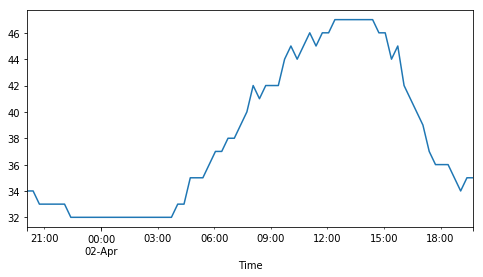

In [43]:
# Visualize time series of temperature
df['Temperature'].plot(figsize=(8,4));

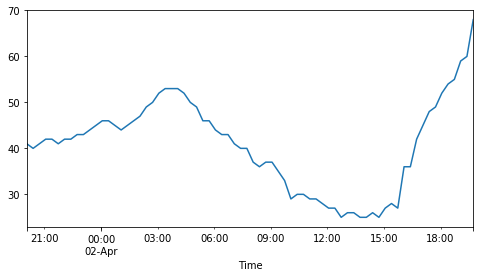

In [44]:
# Visualize time series of humidity
df['Humidity'].plot(figsize=(8,4));

### Frequencies and Periods

Our weather data is timestamped data, but other data may be collected over (non-overlapping) time intervals. pandas represents time interval data using Periods, which are aggregate time periods such as an hour, day, month, year, etc.

You can convert from timestamped data to time interval data using built-in pandas methods:

* .to_period - Converts timestamped data into time interval data
* .to_timestamp - Converts time interval data into timestamped data

There are many frequencies that you can specify for time series data. These frequencies are summarized in Table 11-4 in the text, but the most common frequences (expressed as a string) are:

* D - Day
* H - Hour
* T or min - Minute
* M - MonthEnd
* Q - QuarterEnd
* A - Year

In addition, you can append an integer at the beginning of a frequency to specify a multiple of that time period (e.g., 15D for 15 days).

In [45]:
# Convert timestamped weather data to hourly measurements
pdf = df.to_period('H')
pdf.head()

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-01 20:00,34.0,12.0,41.0,NW,13.0,25.0,0.0,0.0,0.0
2019-04-01 20:00,34.0,12.0,40.0,WNW,17.0,25.0,30.1,0.0,0.0
2019-04-01 20:00,33.0,12.0,41.0,NW,10.0,25.0,30.1,0.0,0.0
2019-04-01 21:00,33.0,12.0,42.0,WNW,8.0,23.0,30.1,0.0,0.0
2019-04-01 21:00,33.0,12.0,42.0,NNW,9.0,26.0,30.1,0.0,0.0


In [46]:
# Period index
pdf.index[:5]

PeriodIndex(['2019-04-01 20:00', '2019-04-01 20:00', '2019-04-01 20:00',
             '2019-04-01 21:00', '2019-04-01 21:00'],
            dtype='period[H]', name='Time', freq='H')

In [47]:
# Convert back to timestamp - Beginning of time interval
pdf.to_timestamp(how='start').head()

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-01 20:00:00,34.0,12.0,41.0,NW,13.0,25.0,0.0,0.0,0.0
2019-04-01 20:00:00,34.0,12.0,40.0,WNW,17.0,25.0,30.1,0.0,0.0
2019-04-01 20:00:00,33.0,12.0,41.0,NW,10.0,25.0,30.1,0.0,0.0
2019-04-01 21:00:00,33.0,12.0,42.0,WNW,8.0,23.0,30.1,0.0,0.0
2019-04-01 21:00:00,33.0,12.0,42.0,NNW,9.0,26.0,30.1,0.0,0.0


In [48]:
# Convert back to timestamp - End of time interval
pdf.to_timestamp(how='end').head()

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Precip Accum
Time,,,,,,,,,
2019-04-01 20:59:59.999999999,34.0,12.0,41.0,NW,13.0,25.0,0.0,0.0,0.0
2019-04-01 20:59:59.999999999,34.0,12.0,40.0,WNW,17.0,25.0,30.1,0.0,0.0
2019-04-01 20:59:59.999999999,33.0,12.0,41.0,NW,10.0,25.0,30.1,0.0,0.0
2019-04-01 21:59:59.999999999,33.0,12.0,42.0,WNW,8.0,23.0,30.1,0.0,0.0
2019-04-01 21:59:59.999999999,33.0,12.0,42.0,NNW,9.0,26.0,30.1,0.0,0.0


### Resampling

Resampling is the process of converting a time series from one frequency to another:

* Aggregating higher frequency data to lower frequency data is called *downsampling*, and essentially involves aggregating the low frequency data over less frequent time periods
* Converting lower frequency data to higher frequency data is called upsampling, and often requires interpolation to fill in the resultant missing values

Both types of resampling are applied using the .resample method, which primarily takes a frequency argument (*freq*) as input. In addition, you can apply the .ffill and .bfill methods to fill in missing values for upsampled data.

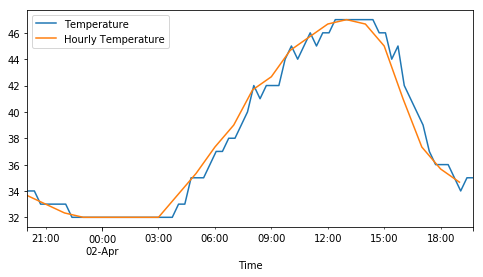

In [49]:
# Downsample temperature to hourly measurements - Overlay with full temperature data
df['Temperature'].plot(figsize=(8,4))
df['Temperature'].resample('H').mean().plot()
plt.legend(('Temperature','Hourly Temperature'))

In [50]:
# Upsample temperature to 15-minute measurements
df['Temperature'].resample('15Min').ffill().head(10)

Time
2019-04-01 20:00:00     NaN
2019-04-01 20:15:00    34.0
2019-04-01 20:30:00    34.0
2019-04-01 20:45:00    33.0
2019-04-01 21:00:00    33.0
2019-04-01 21:15:00    33.0
2019-04-01 21:30:00    33.0
2019-04-01 21:45:00    33.0
2019-04-01 22:00:00    33.0
2019-04-01 22:15:00    33.0
Freq: 15T, Name: Temperature, dtype: float64

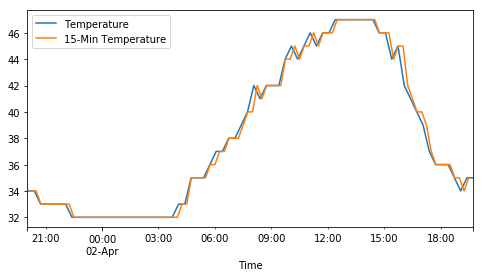

In [51]:
# Upsample temperature to 15-minute measurements - Overlay with full temperature data
df['Temperature'].plot(figsize=(8,4))
df['Temperature'].resample('15Min').ffill().plot()
plt.legend(('Temperature','15-Min Temperature'))

### Moving Window Functions

Moving window functions are one of the most common types of data transformations applied to time series data. They are often used to smooth noisy time series data or time series data with missing data.

The basic idea is that you define a window of time (e.g., 6 hours, 30 days) and apply a function to the data within that window (e.g., mean, sum). Then, you advance (slide) the window forward in time, creating a time series of the summary statistics calculated for each window.

pandas provides functionality for applying moving window functions to time series data:

* .rolling - Equally weights *N* observations, but requires *N* non-NA values to compute (unless you specify the min_periods argument)
* .expanding - Similar to .rolling method, but expands the window size until you encompass the full data
* .ewm - Exponentially weights *N* observations, with more recent observations weighted higher; also does not require *N* non-NA values to compute

These methods are all similar to the standard .groupby method, except that observations in the data are grouped according to each time window.

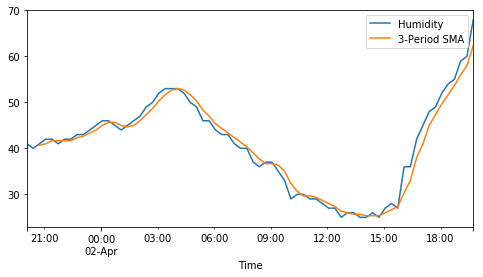

In [52]:
# Plot simple moving average of humidity - .rolling
df['Humidity'].plot(figsize=(8,4))
df['Humidity'].rolling(3).mean().plot()
plt.legend(('Humidity','3-Period SMA'))

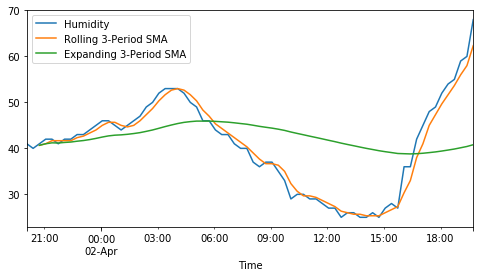

In [53]:
# Plot simple moving average of humidity - .rolling and .expanding
df['Humidity'].plot(figsize=(8,4))
df['Humidity'].rolling(3).mean().plot()
df['Humidity'].expanding(3).mean().plot()
plt.legend(('Humidity','Rolling 3-Period SMA','Expanding 3-Period SMA'))

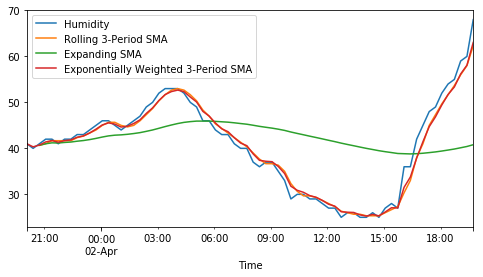

In [54]:
# Plot moving averages of humidity - .rolling, .expanding, and .ewm
df['Humidity'].plot(figsize=(8,4))
df['Humidity'].rolling(3).mean().plot()
df['Humidity'].expanding(3).mean().plot()
df['Humidity'].ewm(span=3).mean().plot()
plt.legend(('Humidity','Rolling 3-Period SMA','Expanding SMA','Exponentially Weighted 3-Period SMA'))

# Next Time: Data Visualization